In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

### Dataset 1 chars

In [250]:
def load_data_transform_1():
    chars_folder_path = os.path.join('data','chars')
    images_folder_path = os.path.join(chars_folder_path, 'images')
    labels_path = os.path.join(chars_folder_path, 'labels.csv')
    
    dataset = pd.read_csv(labels_path)
    images_arr = []
    label_arr = dataset.iloc[:,1].values
    i=0;
    for image in dataset.iloc[:,0]:
        image_path = os.path.join(images_folder_path, image[4:])
        img = Image.open(image_path).convert('L')
        
        img = img.resize((28, 28), Image.Resampling.LANCZOS)
        img_arr = np.array(img)
        images_arr.append(img_arr)
        
        if(i%100 == 0):
            print(f"{i} image done")
        i+=1
        
    return images_arr, label_arr

# x_chars, y_chars = load_data_transform_1()

0 image done
100 image done
200 image done
300 image done
400 image done
500 image done
600 image done
700 image done
800 image done
900 image done
1000 image done
1100 image done
1200 image done
1300 image done
1400 image done
1500 image done
1600 image done
1700 image done
1800 image done
1900 image done
2000 image done
2100 image done
2200 image done
2300 image done
2400 image done
2500 image done
2600 image done
2700 image done
2800 image done
2900 image done
3000 image done
3100 image done
3200 image done
3300 image done
3400 image done


(28, 28)

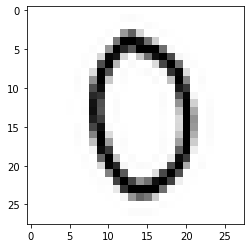

In [254]:
plt.imshow(x_chars[8], cmap = 'gray')

In [256]:
def convert_to_csv_1(x, y):
    x = np.array(x)
    x = x.reshape(-1, 784)
    y = y.reshape(-1,1)
    data = np.hstack((x, y))
    dataFrame = pd.DataFrame(data)
    dataFrame.to_csv('dataset_chars.csv',header = False)
    
# convert_to_csv_1(x_chars, y_chars)

### Dataset 2 alphanum

In [257]:
def load_data_transform_2():
    alphanum_folder_path = os.path.join('data','alphanum')
    img_arr = os.path.join(alphanum_folder_path, 'alphanum-hasy-data-X.npy')
    img_label_arr = os.path.join(alphanum_folder_path, 'alphanum-hasy-data-y.npy')
    symbol_map_path = os.path.join(alphanum_folder_path, 'symbols.csv')
    
    images = np.load(img_arr)
    labels = np.load(img_label_arr).reshape(-1,1)
    
    symbol_map = pd.read_csv(symbol_map_path)
    symbol_map_subset_1 = np.array(symbol_map.iloc[0:26, 0:2].values)
    symbol_map_subset_2 = np.array(symbol_map.iloc[27:37, 0:2].values)
    symbol_map_subset_3 = np.array(symbol_map.iloc[42:67, 0:2].values)
    
    symbol_map_subset = np.vstack((symbol_map_subset_1, symbol_map_subset_2, symbol_map_subset_3))
    
    img_arr = []
    label_arr = []
    
    i=0
    
    for label in labels:
        if label in symbol_map_subset[:,0]:
            im = Image.fromarray(images[i])
            im = im.resize((28, 28), Image.Resampling.LANCZOS)
            img_arr.append(np.array(im))
            x = (np.where(symbol_map_subset[:,0]==label)[0][0])
            label_arr.append(symbol_map_subset[x,1])
            i+=1
    
    return img_arr, label_arr
    
# x_alphanum, y_alphanum = load_data_transform_2()

(784,)

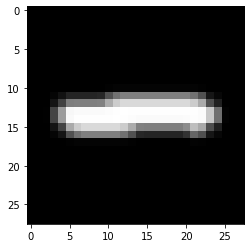

In [261]:
plt.imshow(x[225].reshape(28,28), cmap = 'gray')

In [262]:
def convert_to_csv_2(x, y):
    x = np.array(x)
    x = x.reshape(-1, 784)
    y = np.array(y)
    y = y.reshape(-1,1)
    data = np.hstack((x, y))
    dataFrame = pd.DataFrame(data)
    dataFrame.to_csv('dataset_alphanum.csv',header = False)
    
# convert_to_csv_2(x_alphanum, y_alphanum)

### Dataset 3 EMNIST

In [235]:
def load_data_transform_3():
    chars_folder_path = os.path.join('data','emnist')
    dataset_path = os.path.join(chars_folder_path, 'emnist-letters-train.csv')
    
    dataset = pd.read_csv(dataset_path, header=None)
    labels = dataset.iloc[:,0:1].values
    images = dataset.iloc[:, 1:].values
    
    return images, labels

# x_emnist, y_emnist = load_data_transform_3()    

(88800, 1)
(88800, 784)


In [243]:
def convert_to_csv_3(x, y):
    alphabet = ['','A','B', 'C','D','E','F','G','H','I','J','K','L','M',
                'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    
    y_new = []
    i=0
    for val in y:
        y_new.append(alphabet[(int(val))])
        i+=1
        
    y = np.array(y_new).reshape(-1,1)
    data = np.hstack((x, y))
    df = pd.DataFrame(data)
    df.to_csv('dataset_emnist.csv', header=False, index=False)
    
# convert_to_csv_3(x_emnist, y_emnist)

### Dataset 4 MNIST

In [246]:
def load_data_transform_4():
    mnist_folder_path = os.path.join('data','mnist')
    mnist_data_path = os.path.join(mnist_folder_path, 'dataset.csv')
    mnist_data = pd.read_csv(mnist_data_path)
    y = mnist_data.iloc[:,0:1].values
    x = mnist_data.iloc[:,1:].values
    
    return x, y

# x_mnist, y_mnist = load_data_transform_4()

In [248]:
def convert_to_csv_4(x, y):
    data = np.hstack((x, y))
    
    df = pd.DataFrame(data)
    df.to_csv('dataset_mnist.csv', header=False, index=False)
    
# convert_to_csv_4(x_mnist, y_mnist)

### Dataset Final

In [284]:
def merge_all_data():
    mnist_data = pd.DataFrame(pd.read_csv('dataset_mnist.csv', header=None))
    emnist_data = pd.DataFrame(pd.read_csv('dataset_emnist.csv', header=None))
    alphanum_data = pd.DataFrame(pd.read_csv('dataset_alphanum.csv', header=None))
    chars_data = pd.DataFrame(pd.read_csv('dataset_chars.csv', header=None))
    mnist_data = pd.DataFrame(pd.DataFrame(mnist_data))
    
    dataset_final = pd.concat([mnist_data, emnist_data, alphanum_data, chars_data])
    dataset_final.to_csv('dataset_final.csv', header=False, index=False)

In [285]:
# merge_all_data()